# xweights' example notebook

This notbook shows some examples how to use xweights. We want to calculate time series of spatial averages.

## 1) Read input data

In the first step, read the input data from disk and create a dataset dictionary. The values of the dataset dictionary are the xarray DataSets read from the input, the keys denote the corresponding dataset names. If you have enough computational ressources you can use large intake-esm catalogue files as input too.

In [1]:
import xweights as xw

In [2]:
netcdffile = (
    "tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200601-201012.nc"
)

In [3]:
dataset_dict = xw.Input(netcdffile).dataset_dict

In [4]:
for name, ds in dataset_dict.items():
    break
ds

<xarray.Dataset>
Dimensions:       (rlon: 424, rlat: 412, time: 60, bnds: 2, vertices: 4)
Coordinates:
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    lat           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    height        float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    rotated_pole  |S1 ...
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(1, 412, 424), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_vertices  (rlat, rlon, vertices) float64 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    lat_vertices  (rlat, rlon, vertices) float64 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
Attributes: (12/24)
    contact:                        klima.projektionen@dwd.de
    CORDEX_domain:                  EUR-11
    institute_id:                   CLMcom
    institution:                    CLMcom, Climate Limited-area Modelling Co...
    driving_model_id:               MIROC-MIROC5
    driving_experiment_name:        rcp85
    ...                             ...
    project_id:                     CORDEX
    product:                        output
    frequency:                      mon
    tracking_id:                    490ab140-e096-11e7-b22c-81c28a935756
    creation_date:                  2017-12-14T07:16:13Z
    vars:                           ['tas']

## 2) Get some xweights information

xweights contains some pre-defined regions. Each region contains a geopandas GeoDataFrmae with several geometries. The pre-defined regions are the following:

In [5]:
xw.which_regions()

{'counties': 'Counties (Landkreise) from Germany.',
 'states': 'States (Bundesländer) from Germany',
 'prudence': 'PRUDENCE regions'}

In [6]:
xw.which_subregions("states")

{'states': ['02_Hamburg',
  '03_Niedersachsen',
  '04_Bremen',
  '05_Nordrhein-Westfalen',
  '06_Hessen',
  '07_Rheinland-Pfalz',
  '08_Baden-Württemberg',
  '09_Bayern',
  '10_Saarland',
  '11_Berlin',
  '12_Brandenburg',
  '13_Mecklenburg-Vorpommern',
  '14_Sachsen',
  '15_Sachsen-Anhalt',
  '16_Thüringen',
  '01_Schleswig-Holstein']}

In [7]:
xw.which_subregions("counties")

{'counties': ['01001_Flensburg',
  '01002_Kiel',
  '01003_Lübeck',
  '01004_Neumünster',
  '01051_Dithmarschen',
  '01053_Herzogtum Lauenburg',
  '01054_Nordfriesland',
  '01055_Ostholstein',
  '01057_Plön',
  '01058_Rendsburg-Eckernförde',
  '01059_Schleswig-Flensburg',
  '01060_Segeberg',
  '01061_Steinburg',
  '01062_Stormarn',
  '02000_Hamburg',
  '03101_Braunschweig',
  '03102_Salzgitter',
  '03103_Wolfsburg',
  '03151_Gifhorn',
  '03159_Göttingen',
  '03153_Goslar',
  '03154_Helmstedt',
  '03155_Northeim',
  '03157_Peine',
  '03158_Wolfenbüttel',
  '03241_Region Hannover',
  '03251_Diepholz',
  '03252_Hameln-Pyrmont',
  '03254_Hildesheim',
  '03255_Holzminden',
  '01056_Pinneberg',
  '03256_Nienburg (Weser)',
  '03257_Schaumburg',
  '03351_Celle',
  '03352_Cuxhaven',
  '03353_Harburg',
  '03354_Lüchow-Dannenberg',
  '03355_Lüneburg',
  '03356_Osterholz',
  '03357_Rotenburg (Wümme)',
  '03358_Heidekreis',
  '03359_Stade',
  '03360_Uelzen',
  '03361_Verden',
  '03401_Delmenhorst',


In [8]:
xw.which_subregions("prudence")

{'prudence': ['Iberian Peninsula',
  'France',
  'Mid-Europe',
  'Alps',
  'Mediterranean',
  'Eastern Europe',
  'Northwestern Africa',
  'Middle East',
  'Scandinavia',
  'British Isles']}

## 3) Choose a region 

Now, let's focus on German 'Bundesländer'. We read in the data as geopandas GeoDataFrame.

<AxesSubplot:>

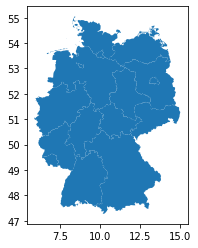

In [9]:
bdl = xw.get_region("states")
bdl.plot()

Of course, you can select singel geometries. Let's take Schleswig-Holstein, Hamburg, Bremen and Lower Saxony.

<AxesSubplot:>

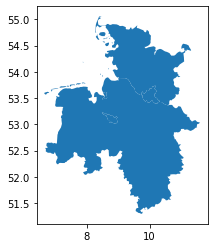

In [10]:
bdl_sub = xw.get_region(
    "states",
    name=["01_Schleswig-Holstein", "02_Hamburg", "03_Niedersachsen", "04_Bremen"],
)
bdl_sub.plot()

Now, we combine those four geometries to one new geometry called 'NothSeaCoast'

<AxesSubplot:>

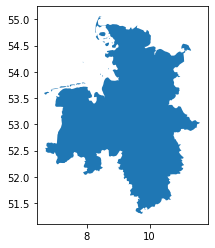

In [11]:
nsc = xw.get_region(
    "states",
    name=["01_Schleswig-Holstein", "02_Hamburg", "03_Niedersachsen", "04_Bremen"],
    merge=["all", "NothSeaCoast"],
)
nsc.plot()

You can read your own shapefile as region file. Then, you have to specify a column name. This column name helps xweights to differentiate the shp file. The example shpfile contains geometries of Neusiedel am See, a small town in Austria.

In [12]:
shpfile = "Seewinkel_map/Seewinkel.shp"

<AxesSubplot:>

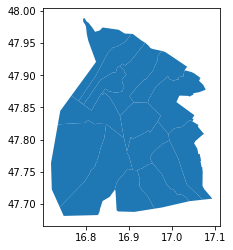

In [13]:
custom = xw.get_region(shpfile, column="VA")
custom.plot()

Here again, you can merge all this small geometries.

<AxesSubplot:>

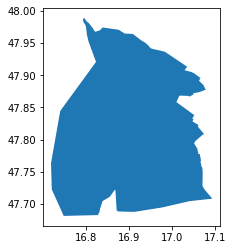

In [14]:
custom = xw.get_region(shpfile, column="VA", merge="VA")
custom.plot()

## 4) Calculate a time series of patial averages

Now, we can calculate a time series of spatial averages using a xarray dataset and geopandas GeoDataFrame.

Here for all 'Bundesländer':

In [15]:
out_bdl = xw.spatial_averager(ds, bdl)
out_bdl

<xarray.Dataset>
Dimensions:       (time: 60, geom: 16, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 ...
    lon           (geom) float64 10.01 9.16 8.742 7.562 ... 11.7 11.03 9.811
    lat           (geom) float64 53.55 52.77 53.2 51.48 ... 52.01 50.9 54.18
  * geom          (geom) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    field_region  (geom) object '02_Hamburg' ... '01_Schleswig-Holstein'
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 dask.array<chunksize=(1, 16), meta=np.ndarray>
    lon_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 16), meta=np.ndarray>
    lat_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 16), meta=np.ndarray>
Attributes:
    regrid_method:  conservative

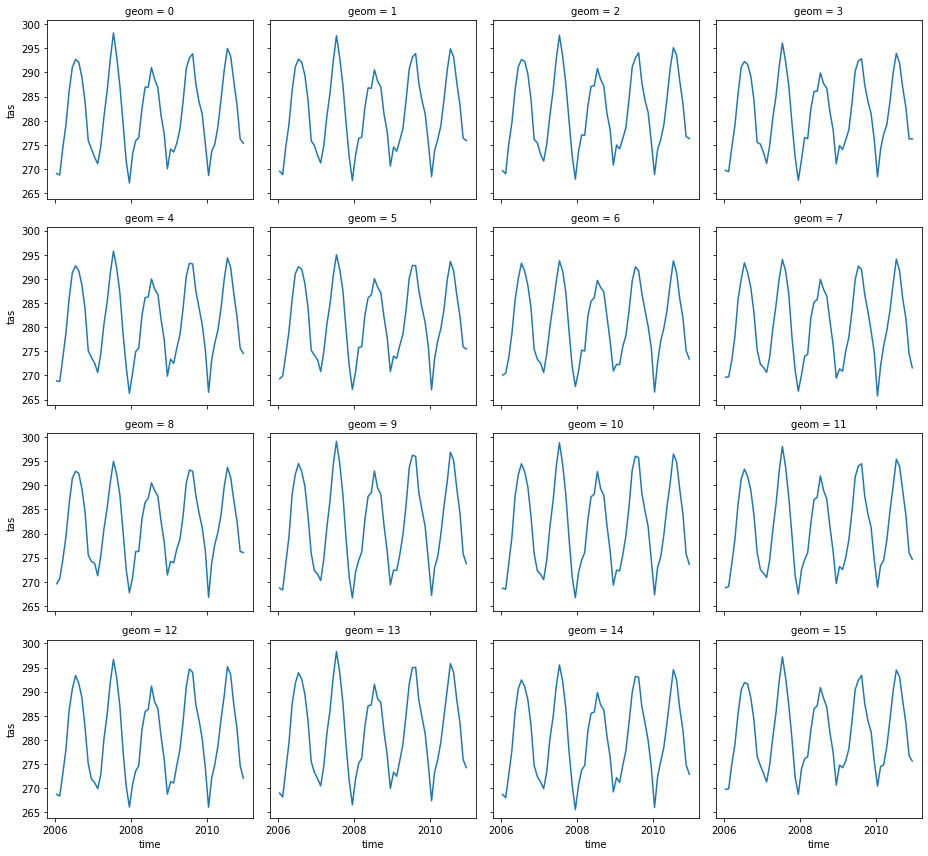

In [16]:
out_bdl.tas.plot(col="geom", col_wrap=4)

In [17]:
out_nsc = xw.spatial_averager(ds, nsc)
out_nsc

<xarray.Dataset>
Dimensions:       (time: 60, geom: 1, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 ...
    lon           (geom) float64 9.33
    lat           (geom) float64 53.14
  * geom          (geom) int64 0
    field_region  (geom) object 'NothSeaCoast'
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lon_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
    lat_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 1), meta=np.ndarray>
Attributes:
    regrid_method:  conservative

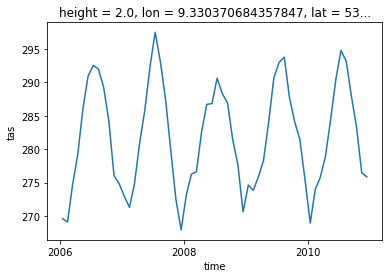

In [18]:
out_nsc.tas.plot()

Ok, that's not pretty exciting I know :/

## 5) Consider land points only 

With xesmf it is very easy to consider land points only. You just have to add a land-sea mask to the xarray Dataset. xesmf automatically considers the mask whil calculating spatial averages.

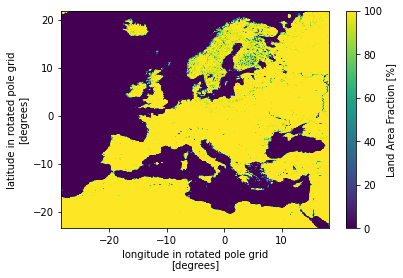

In [19]:
import xarray as xr

lsmfile = "sftlf_EUR-11_MIROC-MIROC5_rcp85_r0i0p0_CLMcom-CCLM4-8-17_v1_fx.nc"
lsm = xr.open_dataset(lsmfile)
lsm.sftlf.plot()

We need to normalize the land-sea mask to the values 0 ant 1.

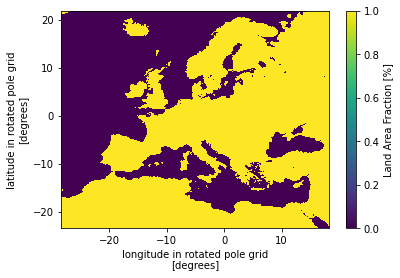

In [20]:
import numpy as np

lsm_norm = xr.where(lsm.sftlf > 0, 1, 0)
lsm_norm.plot()

Now, let's add this mask to our dataset. And calculat for the PRUDENCE regions.

In [21]:
ds_lsm = ds.copy()
ds_lsm["mask"] = lsm_norm

In [22]:
prudence = xw.get_region("prudence")

In [23]:
out_prudence = xw.spatial_averager(ds, prudence)
out_prudence_lsm = xw.spatial_averager(ds_lsm, prudence)
out_prudence_lsm

<xarray.Dataset>
Dimensions:       (time: 60, geom: 10, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 ...
    lon           (geom) float64 -3.5 -0.0 9.0 10.0 14.0 23.0 1.0 34.0 17.5 -4.0
    lat           (geom) float64 40.0 47.0 51.5 46.0 ... 30.5 33.5 62.5 54.5
  * geom          (geom) int64 0 1 2 3 4 5 6 7 8 9
    field_region  (geom) object 'Iberian Peninsula' 'France' ... 'British Isles'
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    lon_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 10), meta=np.ndarray>
    lat_vertices  (vertices, geom) float64 dask.array<chunksize=(4, 10), meta=np.ndarray>
    mask          (geom) int64 1 1 0 0 1 0 0 0 1 1
Attributes:
    regrid_method:  conservative

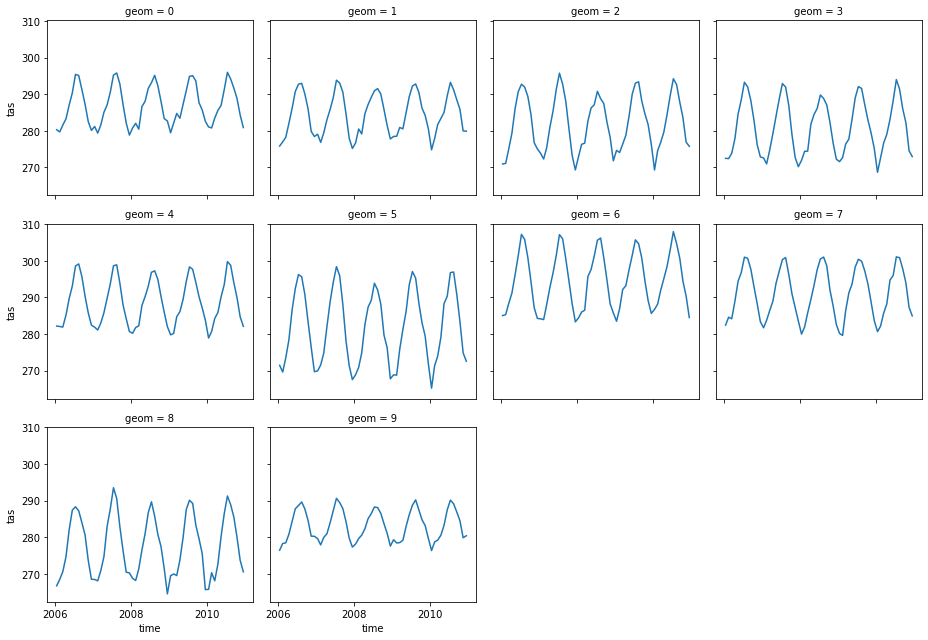

In [24]:
out_prudence.tas.plot(col="geom", col_wrap=4)

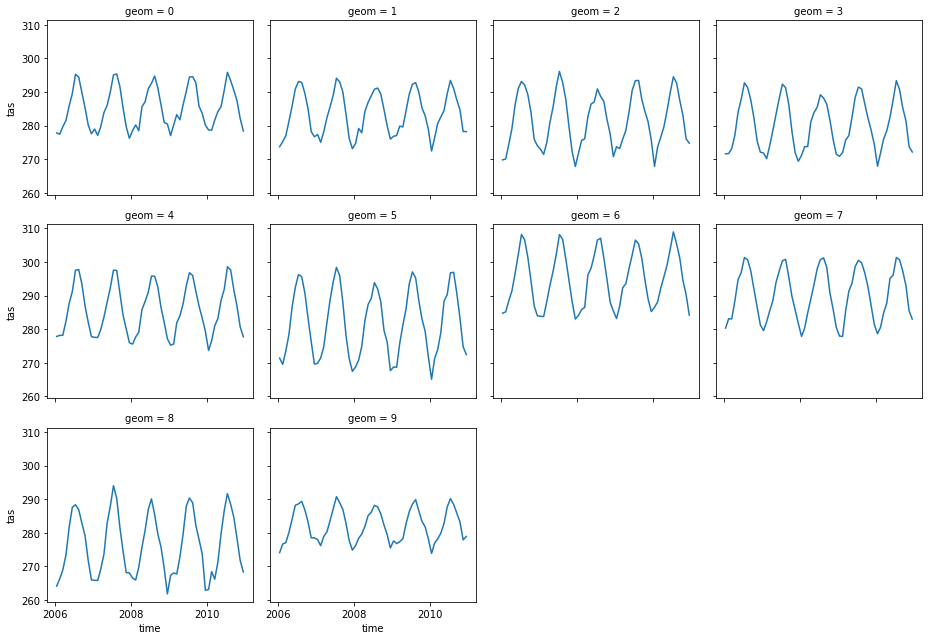

In [25]:
out_prudence_lsm.tas.plot(col="geom", col_wrap=4)

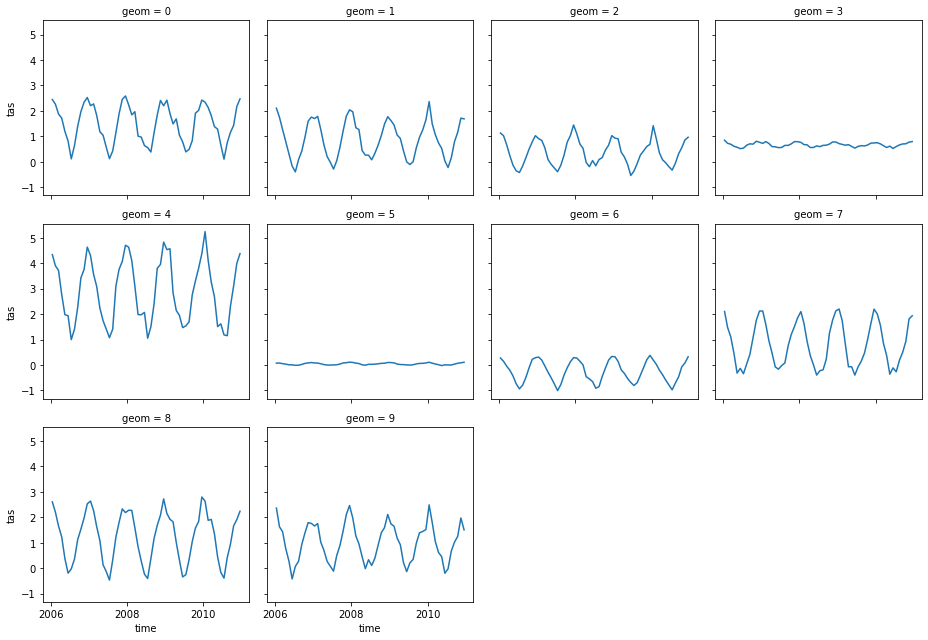

In [26]:
(out_prudence.tas - out_prudence_lsm.tas).plot(col="geom", col_wrap=4)

## 6) Save results to pandas DataFrame

We can simplify the above steps and use a new the function. The result will be written to a pandas DataFrame. 

In [27]:
df = xw.compute_weighted_means_ds(ds, "prudence")
df

,Iberian Peninsula,France,Mid-Europe,Alps,Mediterranean,Eastern Europe,Northwestern Africa,Middle East,Scandinavia,British Isles,variable,name
time,,,,,,,,,,,,
2006-01-16 12:00:00,280.295959,275.831696,270.945007,272.476959,282.176697,271.467468,285.040955,282.432800,266.745392,276.460815,var,dataset
2006-02-15 00:00:00,279.701477,276.975159,271.097412,272.415680,282.060303,269.623749,285.295959,284.608185,268.495941,278.295624,var,dataset
2006-03-16 12:00:00,281.546265,278.229156,275.028656,273.840271,281.905243,273.500977,288.345215,284.161285,270.591858,278.482727,var,dataset
2006-04-16 00:00:00,283.253632,282.088989,279.350555,277.814758,285.153748,278.485626,291.183502,288.910522,274.654633,280.856445,var,dataset
2006-05-16 12:00:00,287.004364,286.146088,286.064026,284.561066,289.676758,286.624084,296.190338,294.420288,282.010864,284.327179,var,dataset
2006-06-16 00:00:00,290.347504,290.733398,290.709015,288.451660,293.120178,292.410583,301.461212,296.750336,287.396393,287.776428,var,dataset
2006-07-16 12:00:00,295.414642,292.723480,292.718628,293.263641,298.576752,296.253143,307.225616,300.987457,288.326294,288.671570,var,dataset
2006-08-16 12:00:00,295.094635,292.961945,291.944214,291.989075,299.137482,295.621948,305.822021,300.701538,287.221130,289.633087,var,dataset
2006-09-16 00:00:00,291.253662,290.043396,289.394196,288.297089,295.701721,290.786072,300.875031,297.720154,283.996552,287.728729,var,dataset


Let's use some paramters to adjust the DataFrame.

In [28]:
df = xw.compute_weighted_means_ds(
    ds,
    "prudence",
    ds_name="tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200601-201012",
    column_names=[
        "institute_id",
        "driving_model_id",
        "experiment_id",
        "driving_model_ensemble_member",
        "model_id",
        "rcm_version_id",
    ],
)
df

,Iberian Peninsula,France,Mid-Europe,Alps,Mediterranean,Eastern Europe,Northwestern Africa,Middle East,Scandinavia,British Isles,variable,institute_id,driving_model_id,experiment_id,driving_model_ensemble_member,model_id,rcm_version_id,name
time,,,,,,,,,,,,,,,,,,
2006-01-16 12:00:00,280.295959,275.831696,270.945007,272.476959,282.176697,271.467468,285.040955,282.432800,266.745392,276.460815,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-02-15 00:00:00,279.701477,276.975159,271.097412,272.415680,282.060303,269.623749,285.295959,284.608185,268.495941,278.295624,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-03-16 12:00:00,281.546265,278.229156,275.028656,273.840271,281.905243,273.500977,288.345215,284.161285,270.591858,278.482727,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-04-16 00:00:00,283.253632,282.088989,279.350555,277.814758,285.153748,278.485626,291.183502,288.910522,274.654633,280.856445,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-05-16 12:00:00,287.004364,286.146088,286.064026,284.561066,289.676758,286.624084,296.190338,294.420288,282.010864,284.327179,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-06-16 00:00:00,290.347504,290.733398,290.709015,288.451660,293.120178,292.410583,301.461212,296.750336,287.396393,287.776428,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-07-16 12:00:00,295.414642,292.723480,292.718628,293.263641,298.576752,296.253143,307.225616,300.987457,288.326294,288.671570,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-08-16 12:00:00,295.094635,292.961945,291.944214,291.989075,299.137482,295.621948,305.822021,300.701538,287.221130,289.633087,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-09-16 00:00:00,291.253662,290.043396,289.394196,288.297089,295.701721,290.786072,300.875031,297.720154,283.996552,287.728729,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...


In [29]:
df_lsm = xw.compute_weighted_means_ds(
    ds_lsm,
    "prudence",
    ds_name="tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200601-201012_landonly",
    column_names=[
        "institute_id",
        "driving_model_id",
        "experiment_id",
        "driving_model_ensemble_member",
        "model_id",
        "rcm_version_id",
    ],
)
df_lsm

,Iberian Peninsula,France,Mid-Europe,Alps,Mediterranean,Eastern Europe,Northwestern Africa,Middle East,Scandinavia,British Isles,variable,institute_id,driving_model_id,experiment_id,driving_model_ensemble_member,model_id,rcm_version_id,name
time,,,,,,,,,,,,,,,,,,
2006-01-16 12:00:00,277.851746,273.726257,269.817444,271.631134,277.839935,271.397705,284.768402,280.328583,264.139679,274.096680,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-02-15 00:00:00,277.441498,275.231567,270.075073,271.691681,278.163971,269.545654,285.151672,283.138611,266.296448,276.669861,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-03-16 12:00:00,279.668335,276.959076,274.355194,273.150696,278.186798,273.450195,288.388702,283.046600,268.930939,277.047119,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-04-16 00:00:00,281.537903,281.298126,279.112885,277.205353,282.379639,278.452850,291.391266,288.440918,273.424072,280.087494,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-05-16 12:00:00,285.806305,285.839447,286.202545,283.991882,287.698334,286.617859,296.624359,294.737946,281.629883,284.049286,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-06-16 00:00:00,289.535309,290.903076,291.063721,287.936981,291.185181,292.405273,302.204163,296.883301,287.589966,288.198029,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-07-16 12:00:00,295.302094,293.122040,293.143646,292.727844,297.582001,296.265778,308.163849,301.332153,288.352631,288.602234,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-08-16 12:00:00,294.454834,292.872772,292.111511,291.338531,297.727234,295.630737,306.613159,300.657776,286.855347,289.357727,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-09-16 00:00:00,289.857330,289.625854,289.241211,287.592438,293.436859,290.763184,301.370514,297.302612,282.872009,286.800751,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...


Now, with a pandas DataFrame feel free to do a lots of statistics :)

Set the parameter ``output`` to a file name and save the DataFrame on disk. 

## 7) All in one

Besides ``xw.compute_weighted_means_ds`` there is another function called ``xw.compute_weighted_means``. This function combines all above steps to one.

In [30]:
df = xw.compute_weighted_means(
    netcdffile,
    "prudence",
    column_names=[
        "institute_id",
        "driving_model_id",
        "experiment_id",
        "driving_model_ensemble_member",
        "model_id",
        "rcm_version_id",
    ],
)
df

,Iberian Peninsula,France,Mid-Europe,Alps,Mediterranean,Eastern Europe,Northwestern Africa,Middle East,Scandinavia,British Isles,variable,institute_id,driving_model_id,experiment_id,driving_model_ensemble_member,model_id,rcm_version_id,name
time,,,,,,,,,,,,,,,,,,
2006-01-16 12:00:00,280.295959,275.831696,270.945007,272.476959,282.176697,271.467468,285.040955,282.432800,266.745392,276.460815,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-02-15 00:00:00,279.701477,276.975159,271.097412,272.415680,282.060303,269.623749,285.295959,284.608185,268.495941,278.295624,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-03-16 12:00:00,281.546265,278.229156,275.028656,273.840271,281.905243,273.500977,288.345215,284.161285,270.591858,278.482727,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-04-16 00:00:00,283.253632,282.088989,279.350555,277.814758,285.153748,278.485626,291.183502,288.910522,274.654633,280.856445,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-05-16 12:00:00,287.004364,286.146088,286.064026,284.561066,289.676758,286.624084,296.190338,294.420288,282.010864,284.327179,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-06-16 00:00:00,290.347504,290.733398,290.709015,288.451660,293.120178,292.410583,301.461212,296.750336,287.396393,287.776428,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-07-16 12:00:00,295.414642,292.723480,292.718628,293.263641,298.576752,296.253143,307.225616,300.987457,288.326294,288.671570,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-08-16 12:00:00,295.094635,292.961945,291.944214,291.989075,299.137482,295.621948,305.822021,300.701538,287.221130,289.633087,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...
2006-09-16 00:00:00,291.253662,290.043396,289.394196,288.297089,295.701721,290.786072,300.875031,297.720154,283.996552,287.728729,var,CLMcom,MIROC-MIROC5,rcp85,r1i1p1,CLMcom-CCLM4-8-17,v1,tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...


As mentioned above, if you have enough computational ressources you can use an intake-esm catalogue file as input instead of one single netCDF file.